# **Graduate Admission Analysis for UCLA**

## **Introduction**

### **Objective**
400 applicants have been surveyed as potential students for UCLA. The university weighs certain aspects of a student's education to determine their acceptance.

The objective is to explore what kind of data is provided, determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.

### **Data Description**
The dataset contains information about a student's:
* GRE Score
* TOEFL Score
* University Ratings
* Statement of Purpose Score
* Letter of Recomendation Score
* CGPA
* Whether the Student Has Done Any Research
* Chance of Admission (What We're Trying to Predict)

## **Importing Libraries and Data**
Importing libraries and setting the default style in Seaborn.

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

Next, let's import our dataset and see what we're working with.

In [2]:
df = pd.read_csv("../input/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## **Exploratory Analysis**

From these charts it looks like we have no missing values! 

It seems as though Serial No. is just an index for students, which we can take out. 

Two columns also have an added space in the label which we'll take out

In [4]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
df.drop(labels='Serial No.', axis=1, inplace=True)

Let's plot a heatmap to see the correlation of all the features compared to Chance to Admit:

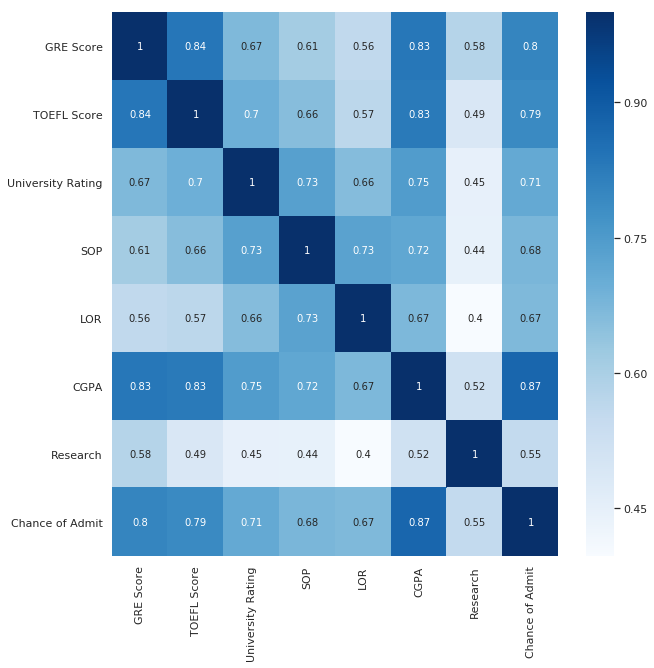

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

The top three features that affect the Chance to Admit are:
1. CGPA
2. GRE Score
3. TOEFL Score

Let's explore these three features to get a better understanding.

### **CGPA**

The Cumulative Grade Point Average is a 10 point grading system.

From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

### **CGPA vs Chance of Admit**

It appears as applicant's CGPA has a strong correlation with their chance of admission.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'CGPA vs Chance of Admit')

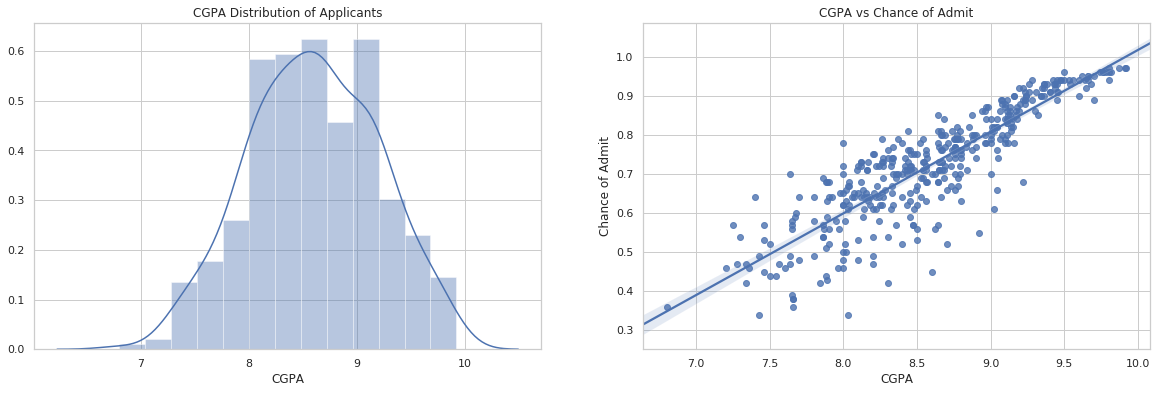

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

### **GRE Score**

The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:
1. Analytical Writing (Scored on a 0-6 scale in half-point increments)
2. Verbal Reasoning (Scored on a 130-170 scale)
3. Quantitative Reasoning (Scored on a 130-170 scale)

In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.

### **GRE Score vs Chance of Admit**

GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'GRE Scores vs Chance of Admit')

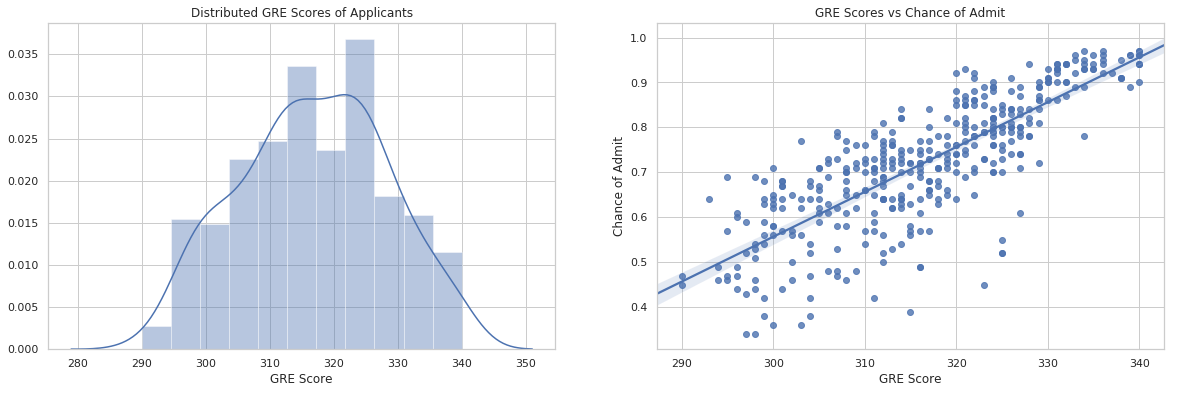

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

### **TOEFL Score**

The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

The test is split up into 4 sections:
1. Reading
2. Listening
3. Speaking
4. Writing

All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.

### **TOEFL Score vs Chance of Admit**

Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'TOEFL Scores vs Chance of Admit')

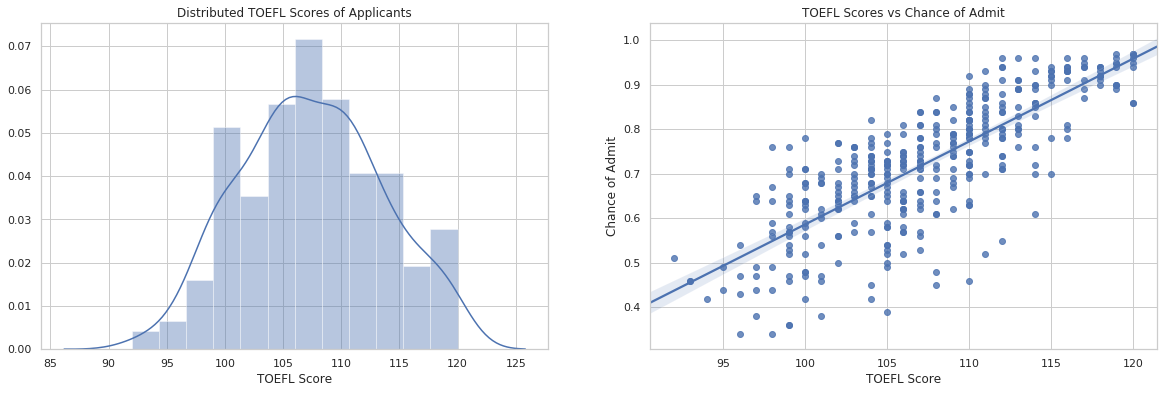

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

For my curiosity, I want to explore the data a little bit further regarding research and university rankings. Even though they hold a lower importance in the chance of admission, it would be nice to understand their characteristics in the dataset.

### **Research**

Let's explore how many applicants have research experience.

It seems the majority of applicants have research experience. However, this is the least important feature, so it doesn't matter all too much if an applicant has the experience or not.

[Text(0,0,'No Research Experience'), Text(0,0,'Has Research Experience')]

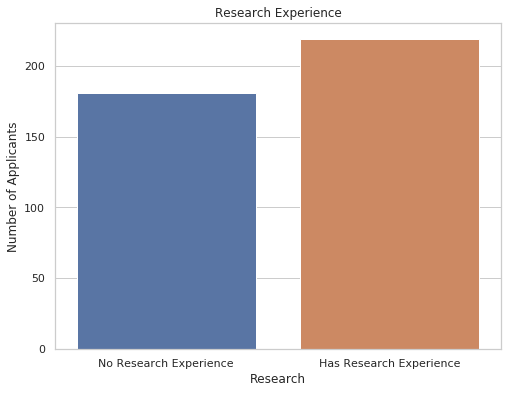

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

### **University Rating**

Let's see the distribution of applicants coming from each kind of university.

Most applicants come from a tier 3 and tier 2 university.

Text(0,0.5,'Number of Applicants')

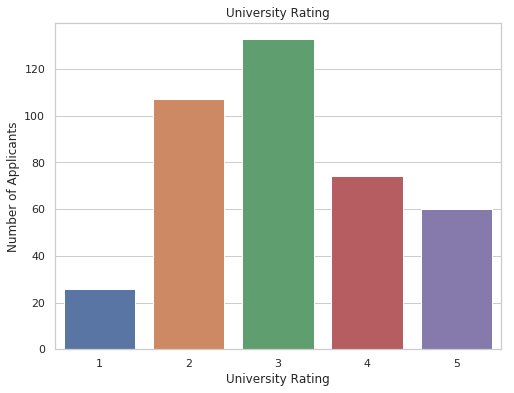

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

## **Preparing Data for Machine Learning**

Now that we understand our dataset, it's time to implement machine learning methods to predict future applicant's chances of admission.

First we have to prepare our data, by splitting it into training and testing data. We'll also scale our data, from 0 to 1, to receive more accurate predictions.

In [11]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## **Machine Learning **

The end goal is to determine if an applicant will be admitted to the univeristy or not. Therefore, this is a classification case. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

1. Logistic Regression
2. Decision Tree Classification
3. Random Forest Classification

### **Logistic Regression**

Our data contains the chance to admit, which is a float value, we should classify the chance of a student's admission as a binary value, accepted and not accepted.

To transform the chance to admit to binary values, we'll assume that if the student's chance is above the mean, they are accepted. If not, they will not be accepted.

So, let's find the mean chance of admission and transform the 'Chance to Admit' column to binary values.

In [13]:
mean_chance = df['Chance of Admit'].mean()

In [14]:
y_train_binary = (y_train > 0.72).astype(int)
y_test_binary = (y_test > 0.72).astype(int)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train_binary)
y_predict = logreg.predict(X_test)
logreg_score = (logreg.score(X_test, y_test_binary))*100
logreg_score

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


96.25

### **Decision Trees**

In [16]:
dec_tree = DecisionTreeClassifier(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train_binary)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test_binary))*100
dec_tree_score

92.5

### **Random Forests**

In [17]:
forest = RandomForestClassifier(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train_binary)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test_binary))*100
forest_score

96.25

### **Comparing Scores**

Let's put all the scores in a table and display their scores side-by-side.

Text(0,0.5,'Accuracy')

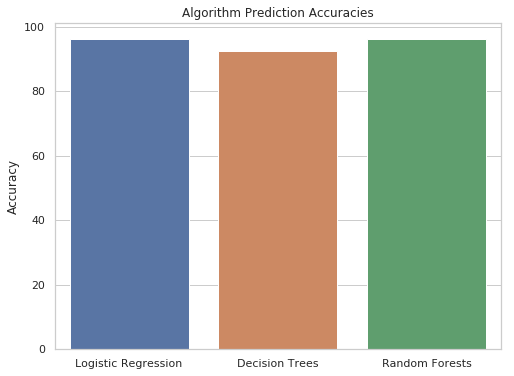

In [18]:
Methods = ['Logistic Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([logreg_score, dec_tree_score, forest_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

### **Selecting the Best Algorithm**

1. Logistic Regression - 96.25%
2. Random Forests - 96.25%
3. Decision Trees - 92.5%

It seems that Logistic Regression and Random Forests are the most accurate methods and will be used to predict the future applicant's chances of admission.



## **Conclusion**

This was a great way to get started on Kaggle and for my first project outside of coursework. It gave me some practice some exploratory analysis and simple machine learning techniques. 

It's great to see what specific variables contribute to the chance of admission and how they are weighted against eachother.